# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

Ну, выведем её. Получается, что функция, по которой будем считать градиент(обрезанный лос), будет выглядеть так $$L(w) =  \frac{1}{n}\left[\sum_i (y_i - \langle\,x_i,w\rangle) ^ 2 \right] + \frac{1}{C}\sum_{i=0}^{D}w_i^2, \text{где суммирование по }i \text{ ведется как раз по мини-батчу} $$

Тогда возьмем производную по $w_j$, учитывая, что $$ \frac{\partial\langle\,x_i,w\rangle}{\partial w_j} =  x_{i,j},$$
$$ \frac{\partial(y_i - \langle\,x_i,w\rangle) ^ 2}{\partial w_j} = -2*(y_i - \langle\,x_i,w\rangle) *  \frac{\partial\langle\,x_i,w\rangle}{\partial w_j} = -2x_{i,j}(y_i - \langle\,x_i,w\rangle),$$
$$\frac{\partial \sum_{i=0}^{D}w_i^2}{\partial w_j} = 2w_j$$
Получаем, что
$$\frac{\partial L(w)}{\partial w_j} = \frac{-2}{n}\left[\sum_i x_{i,j}(y_i - \langle\,x_i,w\rangle) \right] + \frac{2}{C}w_j$$
Тогда, учитывая, что градиент состоит из частных производных, получим итоговую формулу для обновления весов
$$ w_{new} = w_{old} - \nabla_w L(w_{old})\text{,где } \nabla_w L(w) = \left(\frac{-2}{n}\left[\sum_i x_{i,0}(y_i - \langle\,x_i,w\rangle) \right] + \frac{2}{C}w_0,\ldots,\frac{-2}{n}\left[\sum_i x_{i,D}(y_i - \langle\,x_i,w\rangle) \right] + \frac{2}{C}w_D\right)$$

Можно представить функцию в векторном виде, тогда получим, что если $$Y = (y_1,\ldots, y_n)^T, X - \text{ матрица весов, где на  } i,j \text{ месте находится } j-\text{ый признак } i-\text{ого объекта, то }  $$

$$ L(w) = \frac{1}{n} (Y - Xw)^T*(Y - Xw)  + \frac{1}{C} w^Tw$$

Тогда

$$ \nabla_w L(w) = \nabla_w \left(\frac{1}{n} (Y - Xw)^T*(Y - Xw)  + \frac{1}{C} w^Tw\right) 
= \frac{1}{n} \nabla_w \left((Y - Xw)^T*(Y - Xw)\right)  + \frac{1}{C} \nabla_w \left( w^Tw\right) 
= \frac{1}{n} \nabla_w \left(Y^TY - Y^TXw - w^TX^TY + w^TX^TXw\right)  + \frac{1}{C} \nabla_w \left( w^TEw\right)
= \frac{1}{n} \left(-2X^TY +\left(X^TX + X^TX\right)w\right) + \frac{1}{C} \left(E + E^T\right) w
= \frac{2}{n} X^T\left(Xw -Y\right) + \frac{2}{C}w$$


Некоторый анализ: $j-$тая компонента градиента представляет собой сумму ошибок, домноженных на $j-$тый признак, на минибатче + $j-$тая компонента вектора весов с коэффициентом

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

Ну, выведем её. Получается, что функция, по которой будем считать градиент(обрезанный лос), будет выглядеть так $$L(w) =  - \frac{1}{n}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] + \frac{1}{C}\sum_{i=0}^{D}w_i^2, \text{где суммирование по }i \text{ ведется как раз по мини-батчу} $$

Тогда возьмем производную по $w_j$, учитывая, что $$\frac{\partial \frac{1}{1 + \exp(-\langle\,x_i,w\rangle)}}{\partial w_j} = -\frac{1}{(1 + \exp(-\langle\,x_i,w\rangle))^2} \frac{\partial (1 + \exp(-\langle\,x_i,w\rangle))}{\partial w_j} = -\frac{1}{(1 + \exp(-\langle\,x_i,w\rangle))^2} \exp(-\langle\,x_i,w\rangle) \frac{\partial (-\langle\,x_i,w\rangle)}{\partial w_j} = \frac{\exp(-\langle\,x_i,w\rangle)}{(1 + \exp(-\langle\,x_i,w\rangle))^2}  x_{i,j} 
= \frac{1 + \exp(-\langle\,x_i,w\rangle) - 1}{(1 + \exp(-\langle\,x_i,w\rangle))^2}  x_{i,j}
= \left(\frac{1 + \exp(-\langle\,x_i,w\rangle)}{(1 + \exp(-\langle\,x_i,w\rangle))^2} - \frac{1}{(1 + \exp(-\langle\,x_i,w\rangle))^2}\right) x_{i,j}
= (a_i - a_i^2) x_{i,j}
= a_i(1 - a_i) x_{i,j}$$ 

$$ \frac{\partial\log a_i}{\partial w_j} = \frac{1}{a_i}\frac{\partial a_i}{\partial w_j} = (1 - a_i) x_{i,j}$$

$$ \frac{\partial\log (1 - a_i)}{\partial w_j} = \frac{1}{1 - a_i}\frac{\partial (1 - a_i)}{\partial w_j} = -a_i x_{i,j}$$

$$\frac{\partial \sum_{i=0}^{D}w_i^2}{\partial w_j} = 2w_j$$

Получаем, что

$$\frac{\partial L(w)}{\partial w_j} = - \frac{1}{n}\left[\sum_i y_i (1 - a_i) x_{i,j} - ( 1 - y_i) a_i x_{i,j} \right] + \frac{2}{C}w_j
= - \frac{1}{n}\left[\sum_i y_i x_{i,j}  - a_i y_i x_{i,j} - a_i x_{i,j} + y_i a_i x_{i,j} \right] + \frac{2}{C}w_j
= - \frac{1}{n}\left[\sum_i (y_i - a_i) x_{i,j} \right] + \frac{2}{C}w_j$$

Тогда, учитывая, что градиент состоит из частных производных, получим итоговую формулу для градиента в векторном виде

$$ \nabla_w L(w) = \frac{1}{n} X^T\left(A -Y\right) + \frac{2}{C}w\text{,где } A-\text{вектор, который состоит из } a_i$$


$$ w_{new} = w_{old} - \nabla L(w_{old})$$

Некоторый анализ: получили ну очень похожую формулу на ту, что была для линейной регрессии

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

$$\nabla_w\left(\frac{1}{N}(Xw-y)^T(Xw-y)\right) = X^TXw-X^Ty\text{ , было на лекции}$$

Тогда Гессиан будет равен:
$$\nabla_w\left(X^TXw-X^Ty\right) = \nabla_w\left(X^TXw\right) = \left(X^TX\right)^T = X^TX$$

Очевидно, что это положительно определенная матрица. Ч.т.д.

Теперь выведем формулу точного решения линейной регрессии с L2 регуляризацией

$$\nabla_w \left(\frac{1}{n} (Y - Xw)^T*(Y - Xw)  + \frac{1}{C} w^Tw\right) 
= \frac{1}{n} \nabla_w \left((Y - Xw)^T*(Y - Xw)\right)  + \frac{1}{C} \nabla_w \left( w^Tw\right) 
= \frac{1}{n} \nabla_w \left(Y^TY - Y^TXw - w^TX^TY + w^TX^TXw\right)  + \frac{1}{C} \nabla_w \left( w^TEw\right)
= \frac{1}{n} \left(-2X^TY +\left(X^TX + X^TX\right)w\right) + \frac{1}{C} \left(E + E^T\right) w
= \frac{2}{n} X^T\left(Xw -Y\right) + \frac{2}{C}w 
=  \left(\frac{2}{n}X^TX + \frac{2}{C}E\right)w - \frac{2}{n}X^TY = 0$$
Следовательно 
$$w = \frac{1}{n}\left(\frac{1}{n}X^TX + \frac{1}{C}E\right)^{-1}X^TY$$
Из-за регуляризации матрица будет обратима, даже если исходная $X^TX$ матрица такой не была

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Возьмем производную по $a(x_i)$

$$\frac{\partial E(L | x_i)}{\partial a(x_i)} = \frac{\partial\left(-p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))\right)}{\partial a(x_i)} 
= -p(y_i = 1 |x_i ) \frac{1}{a(x_i)} + p(y_i = 0 | x_i) \frac{1}{1 - a(x_i)} = 0$$

Следовательно
$$ -p(y_i = 1 |x_i ) + a(x_i)p(y_i = 1 |x_i ) + a(x_i)p(y_i = 0 | x_i) = -p(y_i = 1 |x_i ) + a(x_i)\left[p(y_i = 1 |x_i ) + p(y_i = 0 | x_i)\right] = -p(y_i = 1 |x_i ) + a(x_i) = 0
$$

Получаем 
$$  a(x_i) = p(y_i = 1 |x_i )
$$ Ч.И.Т.Д.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Вообще, я думаю, что это не связанные вещи, ведь $w_0$ мы добавляем для того, чтобы на нулевом входном векторе признаков можно было бы выдать что-то отличное от 0, поэтому я считаю, что все равно нужно. Регуляризация влияет лишь на лос, но никак не на то, что выдает алгоритм(в плане значения)

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y          - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        randomize = np.arange(len(y))
        np.random.shuffle(randomize)
        X_temp = X[randomize]
        y_temp = y[randomize]
    else:
        X_temp = X.copy()
        y_temp = y.copy()
    for i, batch_num in enumerate(range(0, len(y), batch_size)):
        X_batch = X_temp[i * batch_size:(i + 1) * batch_size]
        y_batch = y_temp[i * batch_size:(i + 1) * batch_size]
        yield (X_batch, y_batch)

In [25]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))    
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss = 1 / len(y_batch) * np.dot((y_batch - np.dot(X_batch, self.weights)).T,
                    (y_batch - np.dot(X_batch, self.weights))) + 1 / self.C * np.dot(self.weights.T,
                                                                                    self.weights)
        else:
            temp_a_i = np.array([sigmoid(np.dot(i, self.weights)) for i in X_batch])
            loss = -1 / len(y_batch) * (np.dot(y_batch, np.log(temp_a_i).T)  \
                                        + np.dot(1 - y_batch, np.log(1 - temp_a_i).T)) + 1 / self.C * np.dot(self.weights.T, self.weights)       
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            loss_grad = 2 / len(y_batch) * np.dot(X_batch.T, (np.dot(X_batch, self.weights) - y_batch)) \
                        + 2 / self.C * self.weights
        else:
            temp_a_i = np.array([sigmoid(np.dot(i, self.weights)) for i in X_batch])
            loss_grad = 1 / len(y_batch) * np.dot(X_batch.T, (temp_a_i - y_batch)) + 2 / self.C * self.weights            
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad
        #todo может стоит делить шаг пополам
        #self.alpha *= 1

    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''        
        # Нужно инициализровать случайно веса
        # Добавляем размерность для фичи равной 1
        self.weights = np.random.sample(len(X[0]) + 1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(np.column_stack([X,np.ones(len(X))]), y, batch_size=1)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X,self.weights)    
        else:
            y_hat = sigmoid(np.dot(X, self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [26]:
def plot_decision_boundary(clf):
    ## Your code Here
    x = np.linspace(-5, 8, 1000)
    if clf.model_type == "lin_reg":
        y = -clf.weights[0] / clf.weights [1] * x - (-1./2. + clf.weights[2]) / clf.weights[1]
    else: 
        y = -clf.weights[0] / clf.weights [1] * x - ( clf.weights[2]) / clf.weights[1] 
        
    y = np.clip(y, -5, 5)
    plt.plot(x, y, label=clf.model_type)
    plt.legend()


w_2 = 0.14050343459918488, w_1 = -0.10240149463774606, w_0 = 0.018987665085361823
w_2 = 0.1621686166026216, w_1 = -0.004296837740253772, w_0 = -0.04927259291780037


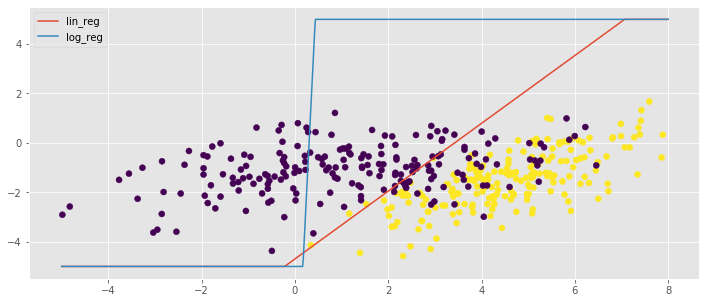

In [27]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]



lin_reg = MySGDClassifier(batch_generator, alpha=0.001, max_epoch=500)
log_reg = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.001, max_epoch=500)

lin_reg.fit(X,y)
log_reg.fit(X,y)

print("w_2 = {}, w_1 = {}, w_0 = {}".format(*lin_reg.weights))
plot_decision_boundary(lin_reg)

print("w_2 = {}, w_1 = {}, w_0 = {}".format(*log_reg.weights))
plot_decision_boundary(log_reg)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [28]:
from sklearn.datasets import make_classification

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [29]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/datasets/samples_generator.py:189: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros(n_samples, dtype=np.int)


Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

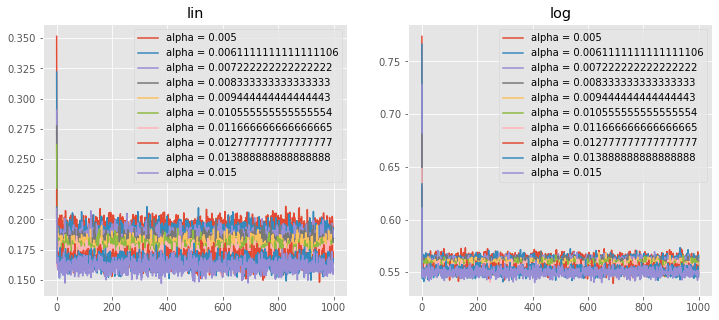

In [30]:
#alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]
#alphas = [0.01]
N = 1000
fig, axs = plt.subplots(1, 2)
for alpha in np.linspace(0.005,0.015,10):
    lin_reg = MySGDClassifier(batch_generator, max_epoch=10, alpha=alpha)
    log_reg = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=10, alpha=alpha)   
    
    lin_reg.fit(X,y)
    log_reg.fit(X,y)
    
    Y_1 = np.array(np.split(np.array(lin_reg.errors_log['loss']), len(lin_reg.errors_log['loss'])/N)).mean(axis=1)
    Y_2 = np.array(np.split(np.array(log_reg.errors_log['loss']), len(lin_reg.errors_log['loss'])/N)).mean(axis=1)
    axs[0].plot(Y_1, label=f"alpha = {alpha}")
    axs[1].plot(Y_2, label=f"alpha = {alpha}")
    plt.plot
axs[1].set_title('log')
axs[0].set_title('lin')
axs[0].legend()
axs[1].legend()
plt.show()
    

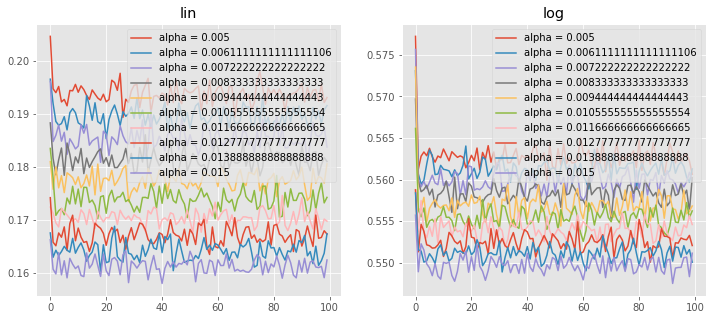

In [31]:
#alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01]
#alphas = [0.01]
N = 10000
fig, axs = plt.subplots(1, 2)
for alpha in np.linspace(0.005,0.015,10):
    lin_reg = MySGDClassifier(batch_generator, max_epoch=10, alpha=alpha)
    log_reg = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=10, alpha=alpha)   
    
    lin_reg.fit(X,y)
    log_reg.fit(X,y)
    
    Y_1 = np.array(np.split(np.array(lin_reg.errors_log['loss']), len(lin_reg.errors_log['loss'])/N)).mean(axis=1)
    Y_2 = np.array(np.split(np.array(log_reg.errors_log['loss']), len(lin_reg.errors_log['loss'])/N)).mean(axis=1)
    axs[0].plot(Y_1, label=f"alpha = {alpha}")
    axs[1].plot(Y_2, label=f"alpha = {alpha}")
    plt.plot
axs[1].set_title('log')
axs[0].set_title('lin')
axs[0].legend()
axs[1].legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in add
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in subtract
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pack

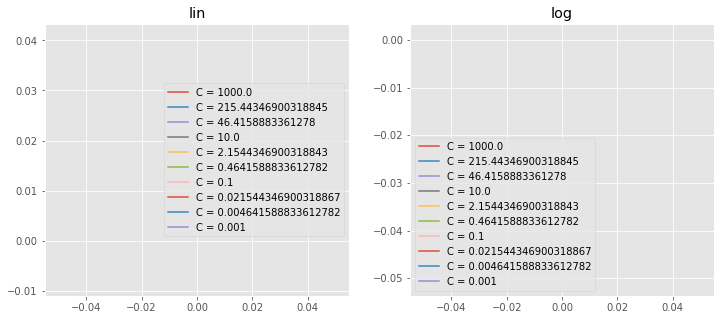

In [553]:
fig, axs = plt.subplots(1, 2)
for C in np.logspace(3, -3, 10):
    lin_reg = MySGDClassifier(batch_generator, max_epoch=10, C=C)
    log_reg = MySGDClassifier(batch_generator, model_type='log_reg', max_epoch=10, C=C)   
    
    lin_reg.fit(X,y)
    log_reg.fit(X,y)
    
    Y_1 = np.mean(lin_reg.weights)
    Y_2 = np.mean(log_reg.weights)
    axs[0].plot(Y_1, label=f"C = {C}")
    axs[1].plot(Y_2, label=f"C = {C}")
    plt.plot
axs[1].set_title('log')
axs[0].set_title('lin')
axs[0].legend()
axs[1].legend()
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [558]:
# Пример, как можно достать урл и заголовок веб-страницы
from bs4 import BeautifulSoup
import codecs
path = 'content/'
filename = '1.dat'
with codecs.open(path + filename, 'r', 'utf-8') as f:
    url = f.readline().strip()
    title = BeautifulSoup(f, 'lxml').title.text

FileNotFoundError: [Errno 2] No such file or directory: 'content/1.dat'

In [ ]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


In [5]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [10]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***